In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Convert labels to integers
y = y.astype(int)

# Display dataset shape
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (70000, 784)
Shape of y: (70000,)


In [ ]:
# Normalize pixel values to the range [0, 1]
X = X / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (56000, 784)
Shape of X_test: (14000, 784)


In [ ]:
# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', gamma='scale', random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9764285714285714


Confusion Matrix:
[[1329    1    3    0    1    2    2    1    4    0]
 [   0 1585    4    3    2    0    0    4    2    0]
 [   3    4 1348    2    3    2    4    8    5    1]
 [   0    2   11 1386    2   11    1    9    7    4]
 [   1    0    2    0 1269    0    3    2    2   16]
 [   0    1    2   15    2 1236    9    1    7    0]
 [   1    0    0    0    4    4 1384    0    3    0]
 [   1    6   12    1    5    1    0 1465    1   11]
 [   2    6    8   12    4    9    6    4 1303    3]
 [   5    8    2    8   14    2    0   11    5 1365]]


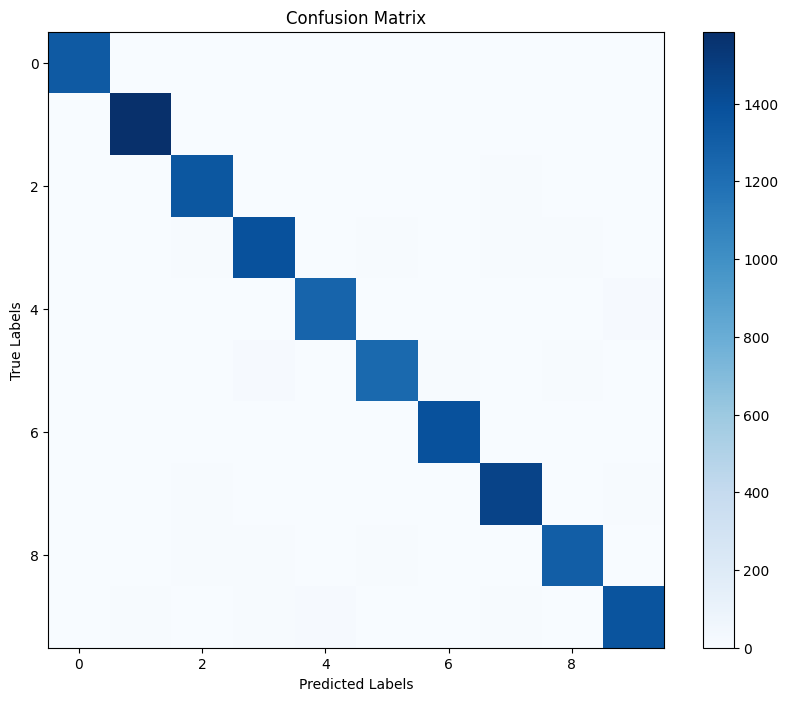

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.96      0.97      1357
           9       0.97      0.96      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



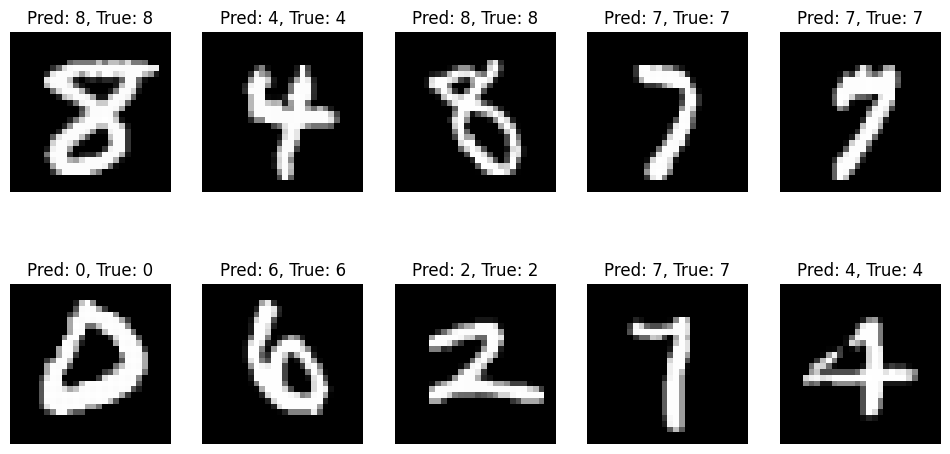

In [ ]:
# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}, True: {y_test[i]}")
    ax.axis('off')
plt.show()